In [162]:
import numpy as np
from sklearn import metrics
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import sys
import scipy.stats as stat 
import subprocess
from sklearn.metrics import roc_curve, auc



%matplotlib inline

In [163]:
def roc_(d,TH=2,week=''):
    fpr, tpr, _ = roc_curve(d.flu.values,d.dec.values)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(4,4))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Out-of-sample ROC (Flu threshold:'+str(TH)+' week:'+str(week)+')')
    plt.legend(loc="lower right")
    return fpr,tpr,auc

In [ ]:
def read_roc(filename,week,TH=2,PLT=False):
    d=pd.read_csv(filename,header=None,sep=" ")
    d.columns=['flu','dec']
    
    for i in d[d['flu'] < TH].index:
        d.iloc[i]=[0,d.loc[i].dec]
    for i in d[d['flu'] >= TH].index:
        d.iloc[i]=[1,d.loc[i].dec]
        
    if PLT:
        plt.figure(figsize=(15,5))
        plt.subplot(1, 2, 1)
        plt.plot(d.flu.values,label='flu')
        plt.subplot(1,2,2)
        plt.plot(d.dec.values,label='dec')
        plt.legend()
        
    tpr,fpr,auc=roc_(d,TH,week)
    return tpr,fpr,auc

# Calculating ROC

---

+ We used data upto week 261 for training (seasons 1-6)
+ We test on seasons 7-9


## The Results are VERY impressive

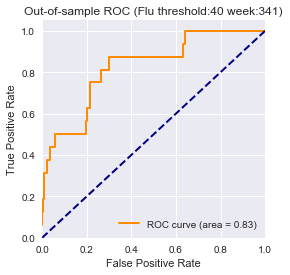

In [165]:
[fpr,tpr,auc]=read_roc('./code/res_341',341,TH=40)

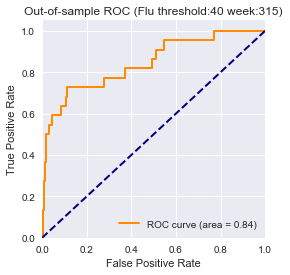

In [166]:
[fpr,tpr,auc]=read_roc('./code/res_315',315,TH=40)

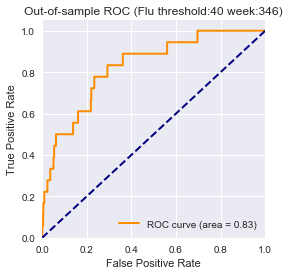

In [167]:
[fpr,tpr,auc]=read_roc('./code/res_346',346,TH=40)

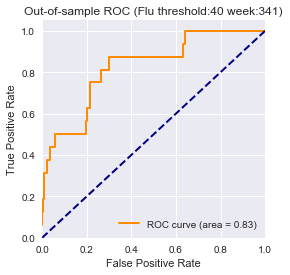

In [168]:
[fpr,tpr,auc]=read_roc('./code/res_341',341,TH=40)

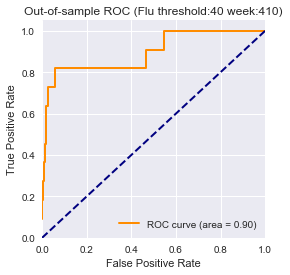

In [169]:
[fpr,tpr,auc]=read_roc('./code/res_410',410,TH=40)

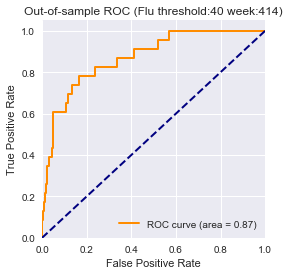

In [170]:
[fpr,tpr,auc]=read_roc('./code/res_414',414,TH=40)